# Semana 1: Árboles de Decisión

### Ejemplo de Árbol de Decision para Deserción de Clientes
Se presenta el siguinete ejemplo que permite predecir la deserción a través de alguna variables principales como la Edad, Ingresos mensuales, Nivel educativo, Frecuencia de compra y Satisfación. Se desarrolla este ejercicio con un conjunto de datos simulado para poder ejemplificar la construcción de un modelo a través de árboles de decisión y la evaluación de los principlaes indicadores.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar conjunto de datos simulado
X, y = make_classification(
    n_samples=500, n_features=5, n_informative=3, n_redundant=0, random_state=42,
    class_sep=1.5
)

# Asignar nombres reales a las características
feature_names = ["Edad", "Ingresos mensuales", "Nivel educativo", "Frecuencia de compra", "Satisfacción"]
df = pd.DataFrame(X, columns=feature_names)

# Transformar las características a valores realistas
df['Edad'] = (df['Edad'] - df['Edad'].min()) / (df['Edad'].max() - df['Edad'].min()) * (70 - 18) + 18  # Edad entre 18 y 70 años
df['Edad'] = df['Edad'].round()

df['Ingresos mensuales'] = (df['Ingresos mensuales'] - df['Ingresos mensuales'].min()) / (df['Ingresos mensuales'].max() - df['Ingresos mensuales'].min()) * 8000 + 1000  # Ingresos entre 1,000 y 8,000 USD
df['Ingresos mensuales'] = df['Ingresos mensuales'].round(2)

df['Nivel educativo'] = pd.cut(df['Nivel educativo'], bins=3, labels=["Básico", "Secundario", "Universitario"])  # Categórico: Básico, Secundario, Universitario

# Convertir 'Nivel educativo' en una variable numérica ordenada
educational_mapping = {"Básico": 1, "Secundario": 2, "Universitario": 3}
df['Nivel educativo'] = df['Nivel educativo'].map(educational_mapping)

df['Frecuencia de compra'] = (df['Frecuencia de compra'] - df['Frecuencia de compra'].min()) / (df['Frecuencia de compra'].max() - df['Frecuencia de compra'].min()) * 20  # Compras entre 0 y 20 al mes
df['Frecuencia de compra'] = df['Frecuencia de compra'].round().astype(int)

df['Satisfacción'] = (df['Satisfacción'] - df['Satisfacción'].min()) / (df['Satisfacción'].max() - df['Satisfacción'].min()) * 10  # Satisfacción en escala de 1 a 10
df['Satisfacción'] = df['Satisfacción'].round()

# Agregar la columna de clase
df['Clase'] = y

# Dividir en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['Clase'], test_size=0.4, random_state=42
)

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predecir los resultados
y_pred = tree_model.predict(X_test)
y_pred_train= tree_model.predict(X_train)


En el código anterior no solo se genera el modelo de clasificación de árbol si no se divide al conjunto de datos en entrenamiento y test. Es importante tomar en cuenta que es bueno tener una muestra de netrenamiento de al menos el 70% de los datos. Importante mencionar que la muestra de entrenamiento nos permitirá construir el modelo, mientras que la de test permite la probar si los indicadires se mantiene y si el modelo en una muestra independiente a la de construcción tendra la misma validez. De igual forma en código que sigue damos un vistazo a los datos generados.

In [65]:
# Mostrar los primeros registros
print(df.head())

   Edad  Ingresos mensuales Nivel educativo  Frecuencia de compra  \
0  27.0             4469.98               2                    11   
1  45.0             5541.71               2                     7   
2  31.0             5558.66               2                    10   
3  34.0             5321.38               3                    15   
4  40.0             6584.19               2                    10   

   Satisfacción  Clase  
0           5.0      0  
1           8.0      1  
2           3.0      1  
3           9.0      1  
4           3.0      1  


In [18]:
# Calcular métricas de rendimiento en Entrenamiento
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 1.00
Precisión: 1.00
Recall: 1.00
F1 Score: 1.00


In [19]:
# Calcular métricas de rendimiento en Test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 0.95
Precisión: 0.95
Recall: 0.96
F1 Score: 0.96


Con base en los resultados anteriores vemos que los indicadores se mantienen, pero nos llama la atención que la claramente caen los indicadores principales, por lo que ya en la evaluación de una muestra independiente podríamos decir que el modelo calsificará un 96% de clientes de forma adecuada. De igual forma podemos ver como se ha generado el árbol y los cortes en las variables principales.

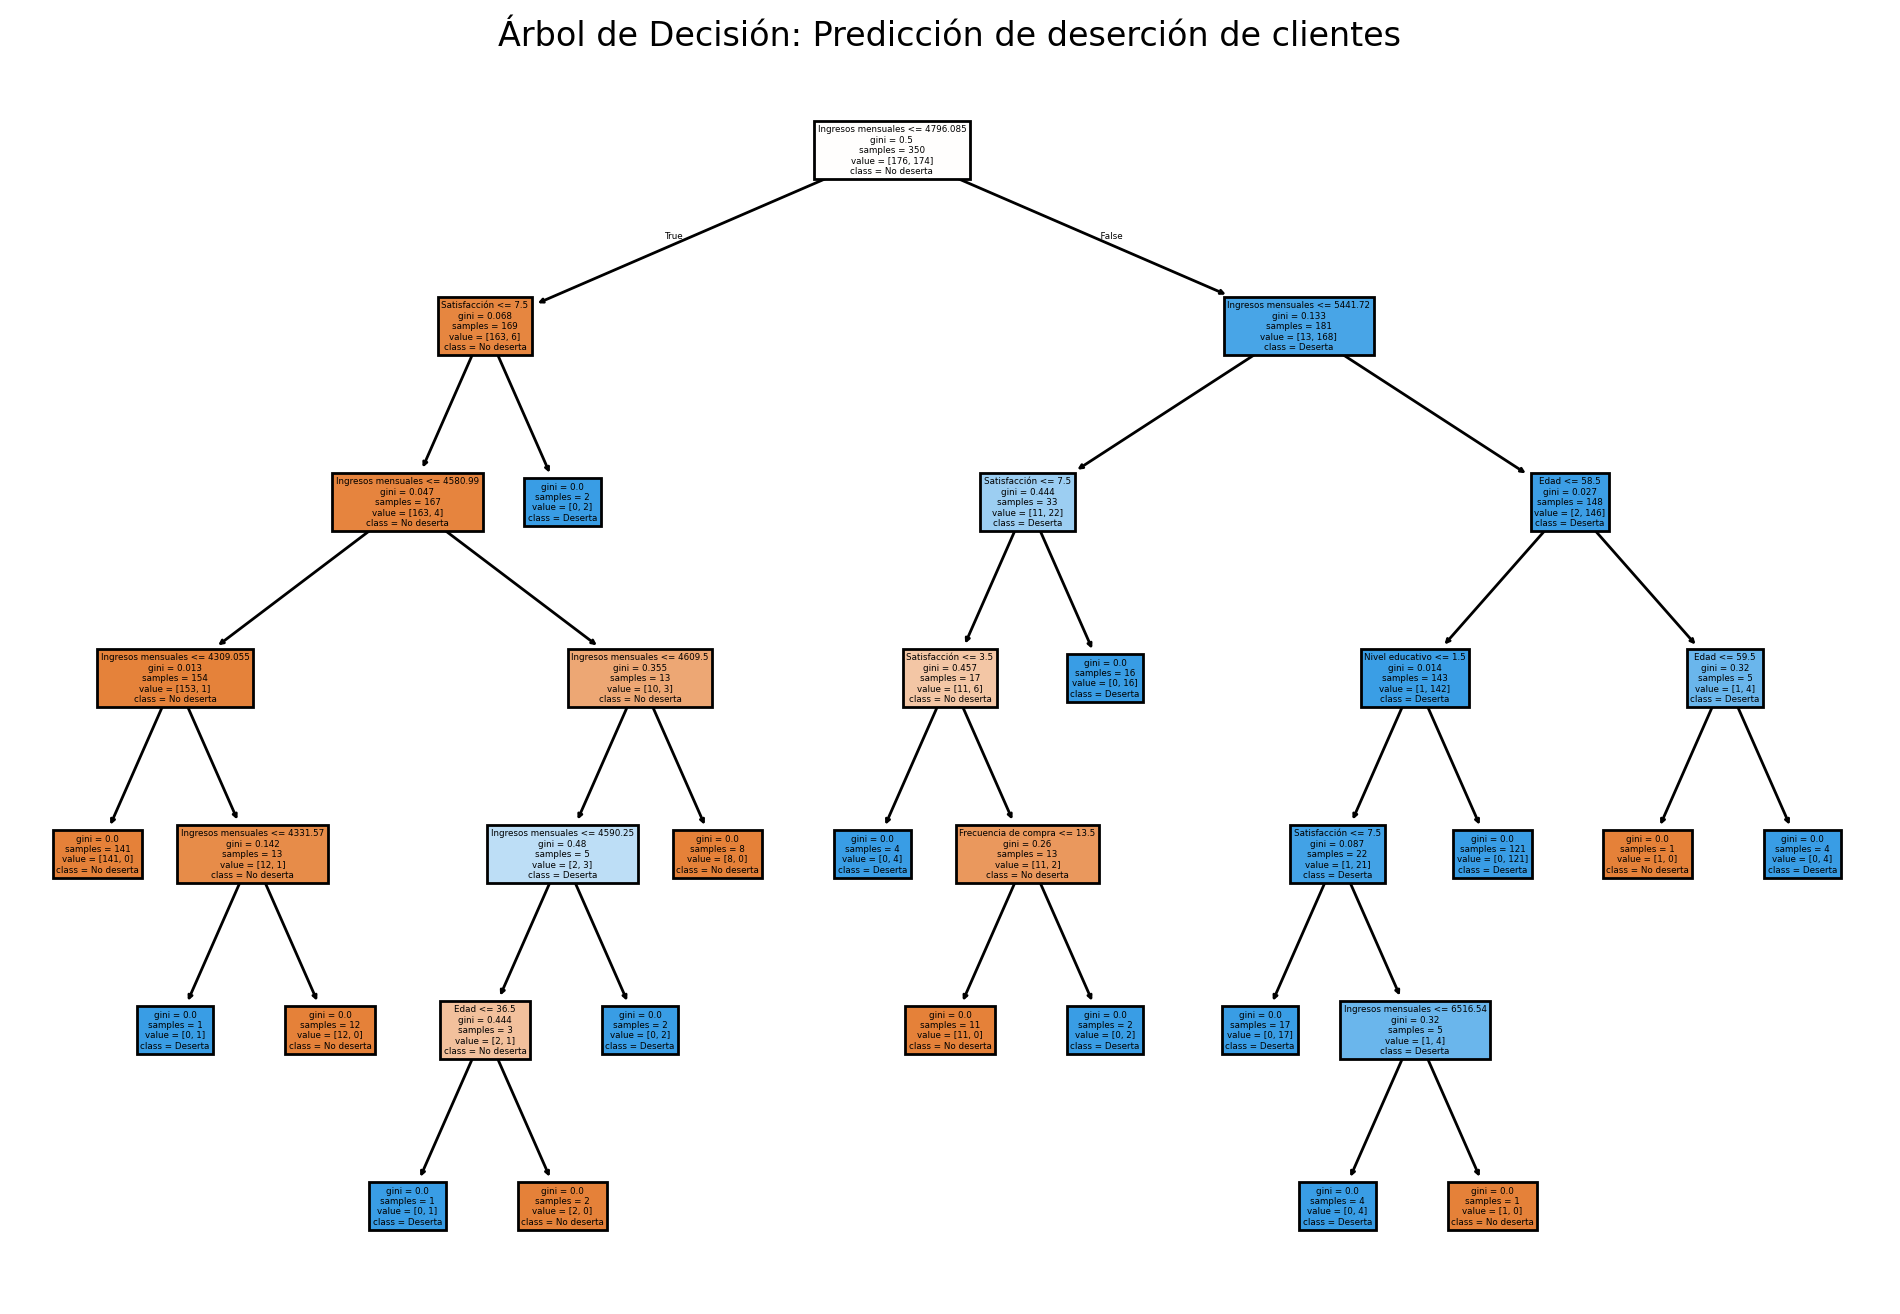

In [69]:

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_names, class_names=["No deserta", "Deserta"], filled=True)
plt.title("Árbol de Decisión: Predicción de deserción de clientes")
plt.show()


Es importante no solo evaluar los indicadores sino también darle un vistazo a la matriz de confusión, para re afirmar el compartamiento de los datos con base en la clasificación. De igual forma no hay que perder de vista el área bajo la curva ROC (AUC). 

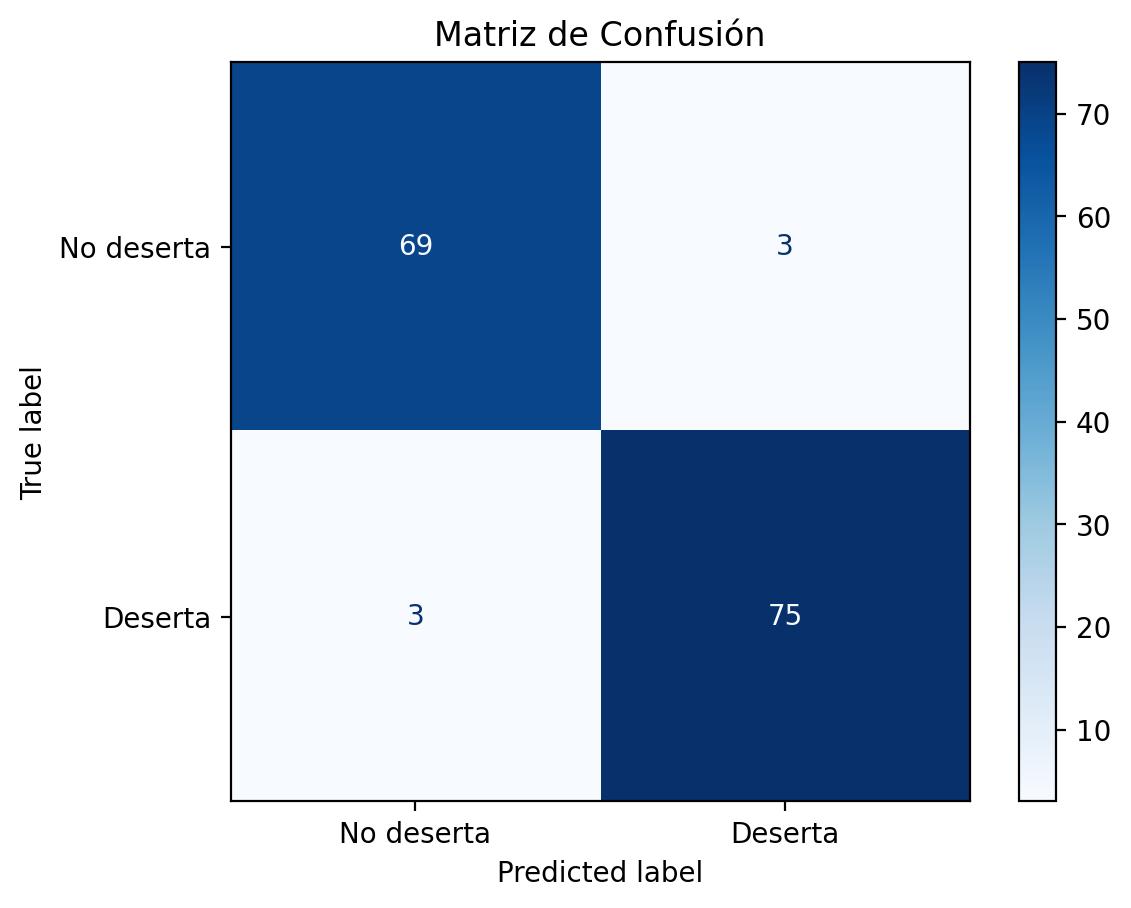

In [70]:
# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No deserta", "Deserta"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

AUC: 0.9599358974358976


Text(0.5, 1.0, 'AUC = 0.96')

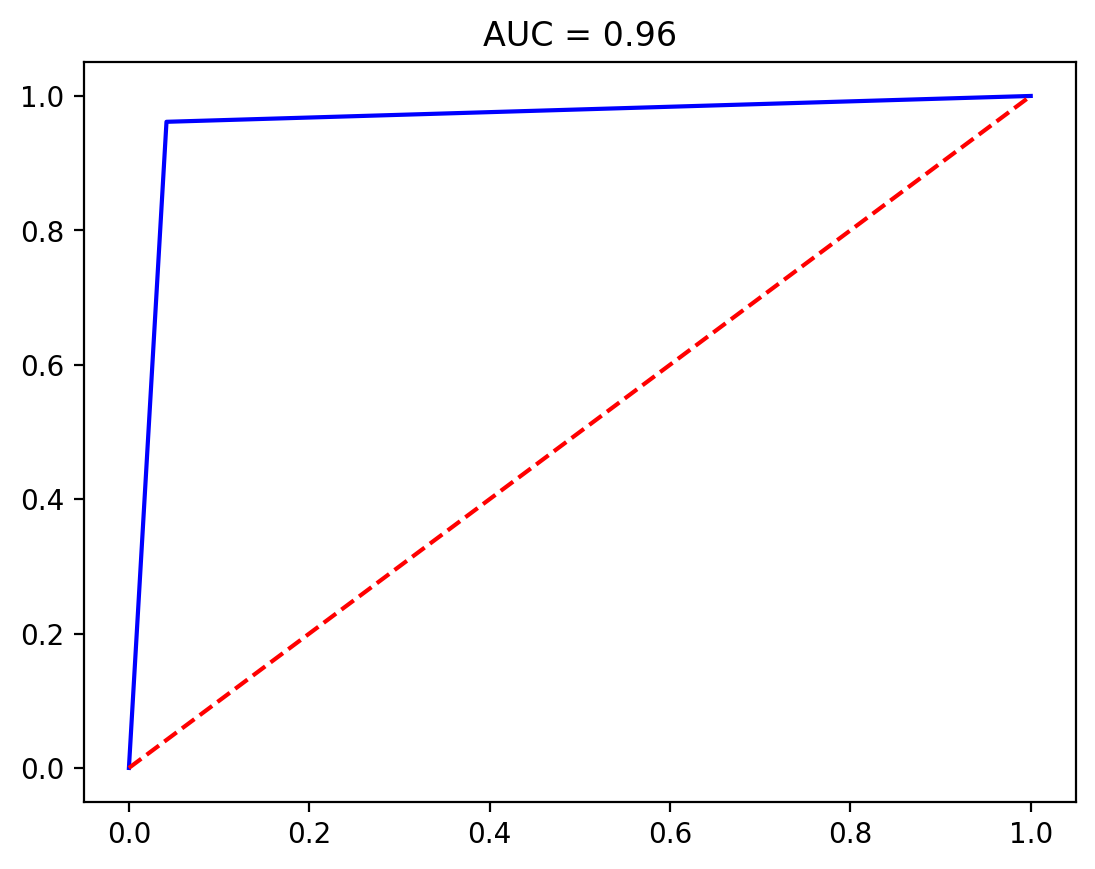

In [71]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

### Random Forest

Se presenta un ejemplo para predecir la rotación de los empleados, al igual que el ejemplo anterior se simulan datos para obtener un escenario para discutir cada uno de los indicadores obtenidos.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np


np.random.seed(42)  # Fijar semilla para reproducibilidad

n_samples = 1500  # Número de observaciones deseadas
data = pd.DataFrame({
    'edad': np.random.randint(18, 65, size=n_samples),  # Edad entre 18 y 65 años
    'salario': np.random.randint(30000, 100000, size=n_samples),  # Salario entre 30,000 y 100,000 USD
    'horas_trabajadas': np.random.randint(30, 50, size=n_samples),  # Horas trabajadas entre 30 y 50 por semana
    'satisfaccion_laboral': np.round(np.random.uniform(0.5, 1.0, size=n_samples), 2),  # Satisfacción entre 0.5 y 1.0
    'rotación': np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Rotación con 70% "No rota" y 30% "Rota"
})

#Separar características y etiqueta
X = data[['edad', 'salario', 'horas_trabajadas', 'satisfaccion_laboral']]
y = data['rotación']

#Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, oob_score=True)
modelo_rf.fit(X_train, y_train)

y_pred = modelo_rf.predict(X_test)
y_pred_train= modelo_rf.predict(X_train)

Como se puede observar en el código anterior se han simulado alrededor de 1500 observaciones y lo que se quiere evaluar es como estas variables como la Edad, el salario, las horas trabajadas y la satisfacción laboral inciden en que el empleado deserte o no de la empresa. Al igual que lo vimos en el ejemplo de árboles de decisión se ha tomado como muestra de entrenamiento el 70% de los datos y se explone el código para generar el algoritmo de Random Forest.

In [3]:
# Calcular métricas de rendimiento en Test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 0.53
Precisión: 0.52
Recall: 0.60
F1 Score: 0.56


Al observar las métricas anteriores se puede observar que el modelo no predice adecuadamente la variable objetivo, ya que si vemos la exactitud tan solo el 53% de empleados que Rota ha podido ser pronosticado de forma correcta. De igual forma podemos ver el árbol y las variables con base en su importancia.

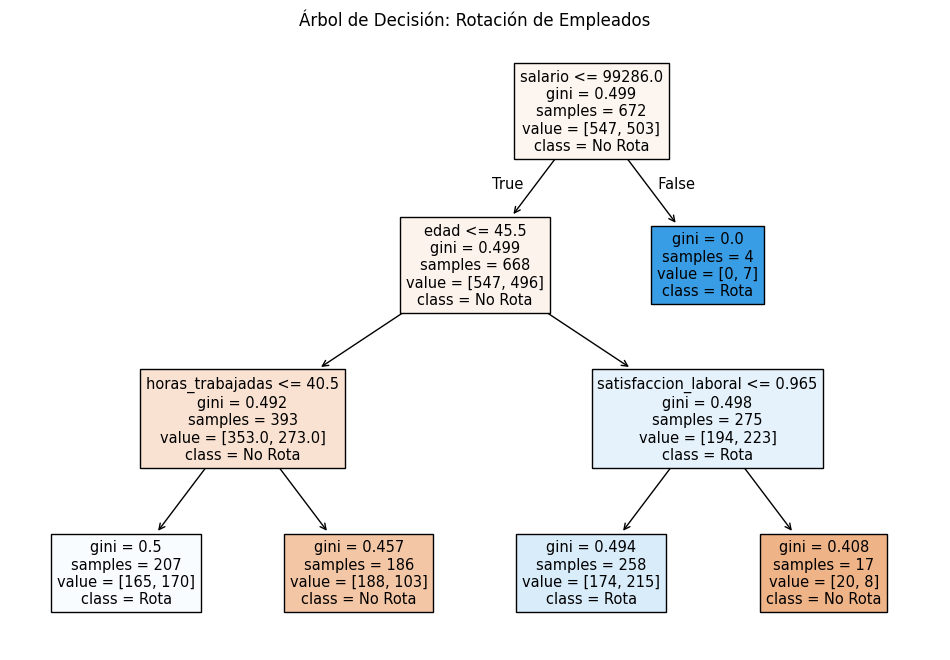

In [4]:

plt.figure(figsize=(12, 8))
plot_tree(modelo_rf.estimators_[0], feature_names=data.columns, class_names=["No Rota", "Rota"], filled=True)
plt.title("Árbol de Decisión: Rotación de Empleados")
plt.show()


In [5]:
#Importancia de las características
importancia = modelo_rf.feature_importances_
print("\nImportancia de características:")
for i, col in enumerate(X.columns):print(f"{col}: {importancia[i]:.4f}")

#Evaluación OOB (OutofBag)
print("\nExactitud OOB:", modelo_rf.oob_score_)


Importancia de características:
edad: 0.2345
salario: 0.2944
horas_trabajadas: 0.2875
satisfaccion_laboral: 0.1836

Exactitud OOB: 0.5219047619047619


Analizando la matriz de confusión ratificamos lo que ya se había observado en los indicadores anteriores, claramente tenemos una mayor presencia de falsos positivos, es decir que estamos estimando una mayor rotación que la que realmente existe. De igual forma al observar el AUC claramente el modelo no logra discriminar entre los empleados que rotan y no rotan.

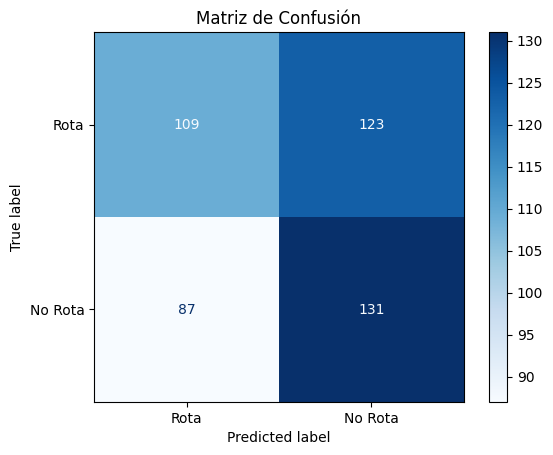

In [6]:
cm = confusion_matrix(y_test, y_pred, labels=modelo_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rota", "No Rota"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

AUC: 0.5353725086997786


Text(0.5, 1.0, 'AUC = 0.54')

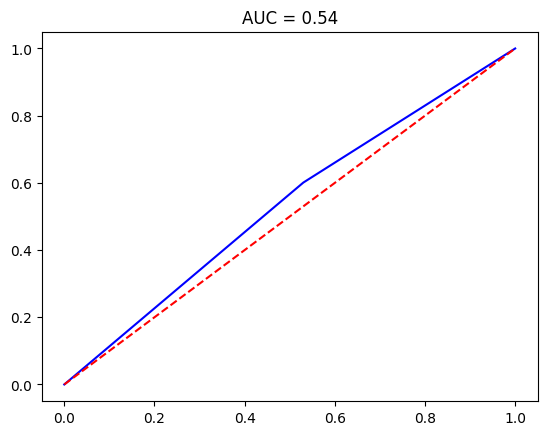

In [7]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plt.plot(false_positive_rate, recall, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('AUC = %0.2f' % roc_auc)

### XG Boost
Ahora que pasaría si probamos un XGboost sobre los datos anteriores, crees que obtendriamos mejores resultados? En el código inferior se tiene el código para generar un XGBoost, como vamos a usar los datos anteriores, tomamos las variables generadas tanto de entrenamiento y test y corremos el modelo.

In [3]:
from xgboost import XGBClassifier

# Crear el modelo XGBoost
modelo_xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)

# Predicciones
y_predxg = modelo_xgb.predict(X_test)
y_pred_trainxg = modelo_xgb.predict(X_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:07:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Al evaluar las métricas del modelo podemos observar que no mejoramos, ahora el Recall es mas bajo y en general todas cayeron en 1 punto porcentual.

In [4]:
# Calcular métricas de rendimiento en Test
accuracy = accuracy_score(y_test, y_predxg)
precision = precision_score(y_test, y_predxg)
recall = recall_score(y_test, y_predxg)
f1 = f1_score(y_test, y_predxg)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 0.51
Precisión: 0.49
Recall: 0.47
F1 Score: 0.48


De igual forma al observar el AUC vemos que tenemos un indicador más bajo, por lo que claramente el modelo no es mejor que el anterior ya que tiene más problemas de clasificación.

AUC: 0.5056350838342296


Text(0.5, 1.0, 'AUC = 0.51')

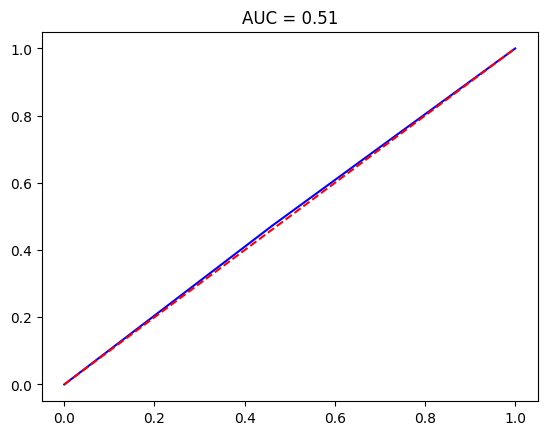

In [7]:
#Matriz de confusión
false_positive_rate, recall, thresholds = roc_curve(y_test, y_predxg)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plt.plot(false_positive_rate, recall, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('AUC = %0.2f' % roc_auc)